PARCIAL 2 

VISUALIZACION COMUNIDADES (ALGORITMO DE LOUVAIN)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import random
import networkx as nx
import pandas as pd

In [13]:
df= pd.read_csv("World.csv")
df.head()

Origen          Destino  ConexionAeropuertos
0  Papua New Guinea        Australia                   19
1  Papua New Guinea      Philippines                    5
2  Papua New Guinea        Indonesia                    2
3  Papua New Guinea  Solomon Islands                    2
4  Papua New Guinea        Hong Kong                    2

In [3]:
flights_graph = nx.from_pandas_edgelist(df, source= "Origen",target= "Destino")

In [4]:
print(flights_graph)

Graph with 229 nodes and 2852 edges


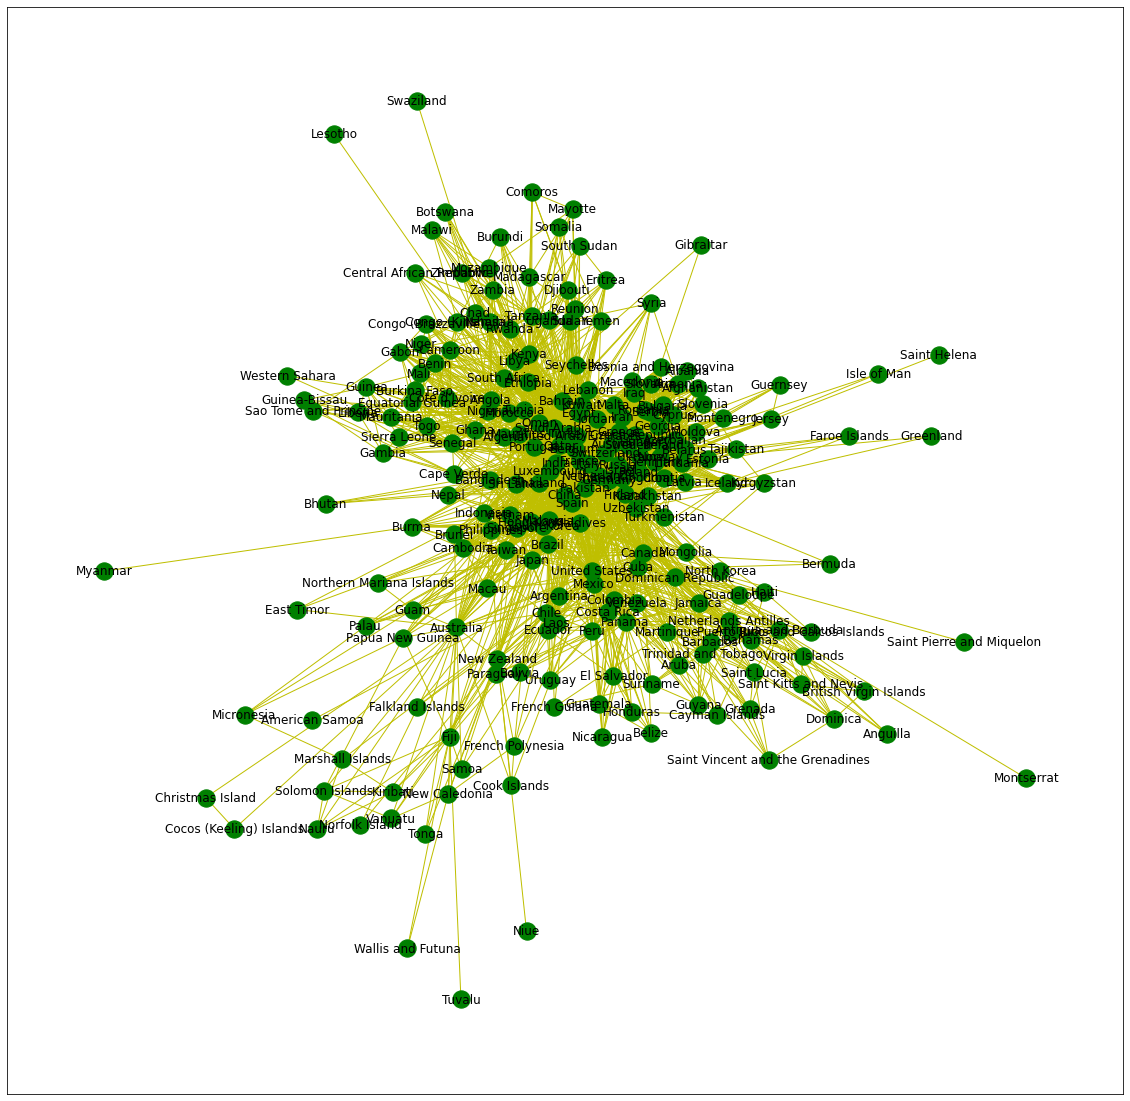

In [5]:
plt.figure(figsize=(20,20))
nx.draw_networkx(flights_graph, with_labels = True, node_color= 'g', edge_color='y')


In [6]:
import networkx.algorithms.community as nx_comm
partition = community.community_louvain.best_partition(flights_graph)
count=list(set([i for i in partition.values()]))
print("Cantidad de comunidades detectadas:",len(count))

NameError: name 'community' is not defined

In [ ]:
community_0=[]
community_1=[]
community_2=[]
community_3=[]
communities=[]
for i in partition.items():
     if i[1]==0:
          community_0.append(i[0])
     if i[1]==1:
          community_1.append(i[0])
     if i[1]==2:
          community_2.append(i[0])
     if i[1]==3:
          community_3.append(i[0])    

communities.append(community_0)
communities.append(community_1) 
communities.append(community_2) 
communities.append(community_3)           

In [ ]:

for i in range(len(communities)):
    print("Comunidad ------>",i,":\n",communities[i])

In [ ]:
for i in range(len(communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(communities[i]))


In [ ]:
def visualizar_comunidades(community, number, node_color):
    G=nx.Graph()
    G=flights_graph.subgraph(list(community))
    print("Visualizacion Comunidad:",number,"\n")
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G, with_labels = True, node_color= node_color, edge_color='m')

In [ ]:
visualizar_comunidades(communities[0],0,'b')

In [ ]:
visualizar_comunidades(communities[1],1,'g')

In [ ]:
visualizar_comunidades(communities[2],2,'y')

In [ ]:
visualizar_comunidades(communities[3],3,'r')

In [ ]:
def aristas_que_cruzan(communitie, G):
    total=0
    nodo_actual=0
    vecinos = []
    subgraph=nx.Graph()
    subgraph= flights_graph.subgraph(list(communitie))
    for i in range(len(communitie)):
        nodo_actual= communitie[i]
        vecinos = list(G.neighbors(nodo_actual))
        for j in range(len(vecinos)):
            if not subgraph.has_node(vecinos[j]) :
                total= total +1
                
        
    return total

In [ ]:
sum=0
for i in range(len(communities)):    
    print("Cantidad de aristas que cruzan de la comunidad",i,"-------->",aristas_que_cruzan(list(communities[i]), flights_graph))
    sum = sum +(aristas_que_cruzan(list(communities[i]), flights_graph))
print("Cantidad total de aristas que cruzan -------->",sum/2)    

SUBCOMUNIDADES 

SUBCOMUNIDAD ----> Proveniente de SUBRED : COMUNIDAD 0

In [11]:
import community
subgraph=nx.Graph()
subgraph= flights_graph.subgraph(list(communities[0]))
partition = community.community_louvain.best_partition(subgraph)
count=list(set([i for i in partition.values()]))
print("Cantidad de comunidades detectadas:",len(count))


ModuleNotFoundError: No module named 'community'

In [9]:
subgraph_community_0=[]
subgraph_community_1=[]
subgraph_community_2=[]
subgraph_community_3=[]
subgraph_communities=[]
for i in partition.items():
     if i[1]==0:
          subgraph_community_0.append(i[0])
     if i[1]==1:
          subgraph_community_1.append(i[0])
     if i[1]==2:
          subgraph_community_2.append(i[0])
     if i[1]==3:
          subgraph_community_3.append(i[0])    

subgraph_communities.append(subgraph_community_0)
subgraph_communities.append(subgraph_community_1) 
subgraph_communities.append(subgraph_community_2) 
subgraph_communities.append(subgraph_community_3) 

NameError: name 'partition' is not defined

In [10]:
for i in range(len(subgraph_communities)):
    print("Comunidad ------>",i,":\n",subgraph_communities[i])

In [ ]:
for i in range(len(subgraph_communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(subgraph_communities[i]))

Visualizacion Comunidad: 0 



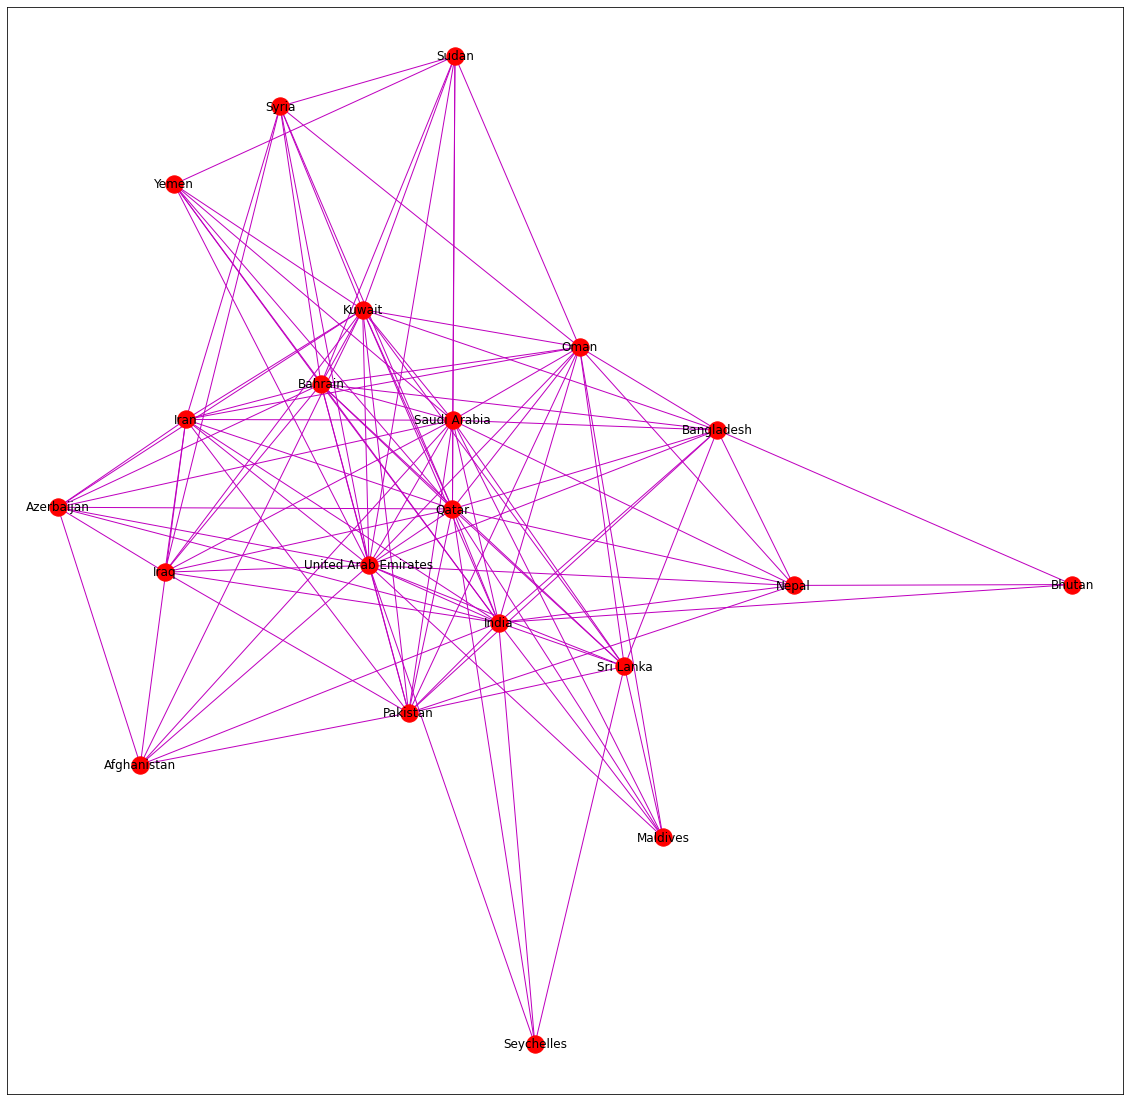

In [108]:
visualizar_comunidades(subgraph_communities[0],0,'r')

Visualizacion Comunidad: 1 



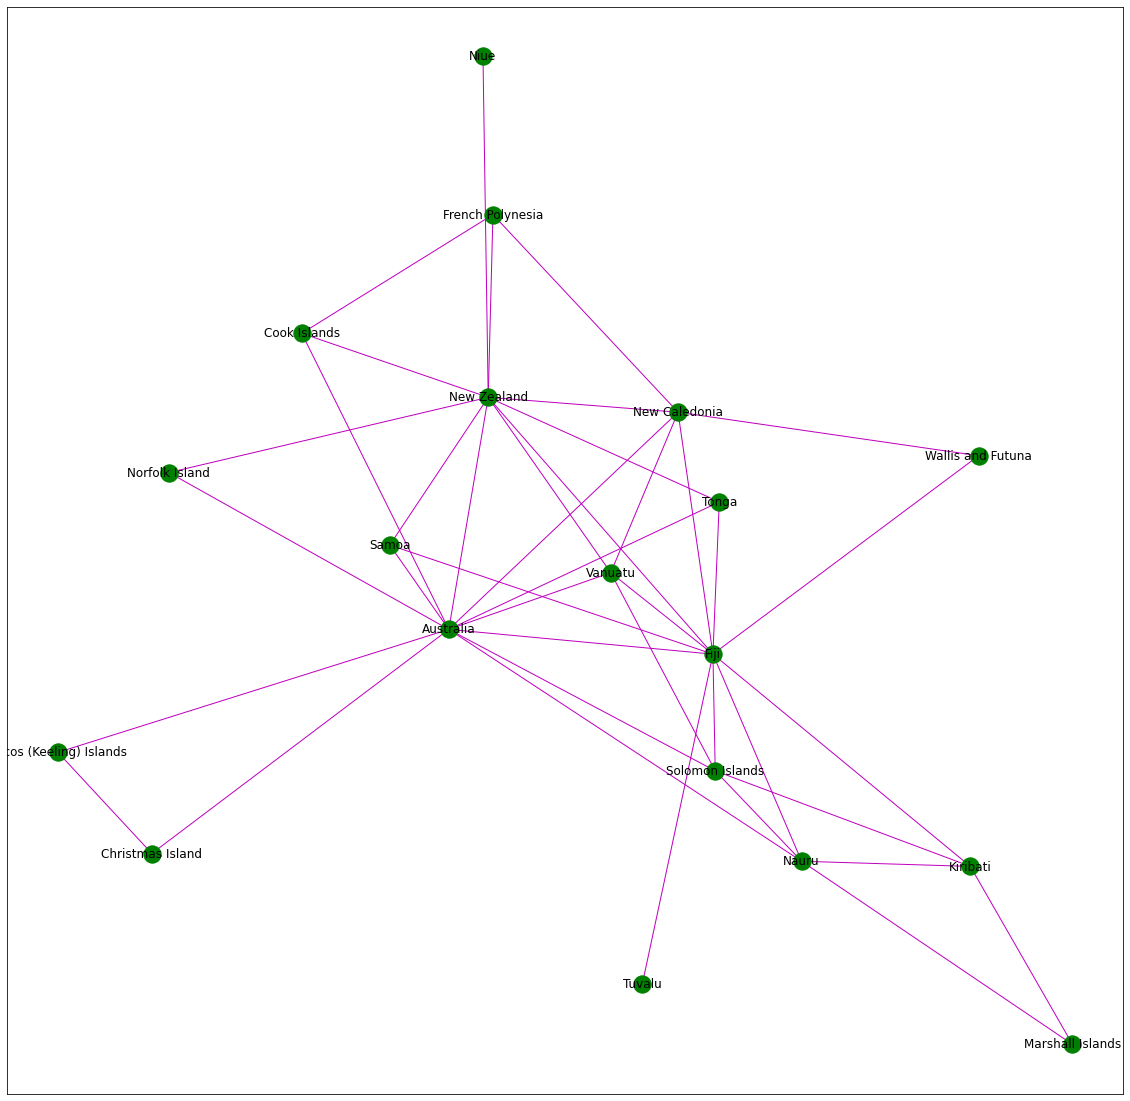

In [109]:
visualizar_comunidades(subgraph_communities[1],1,'g')

Visualizacion Comunidad: 2 



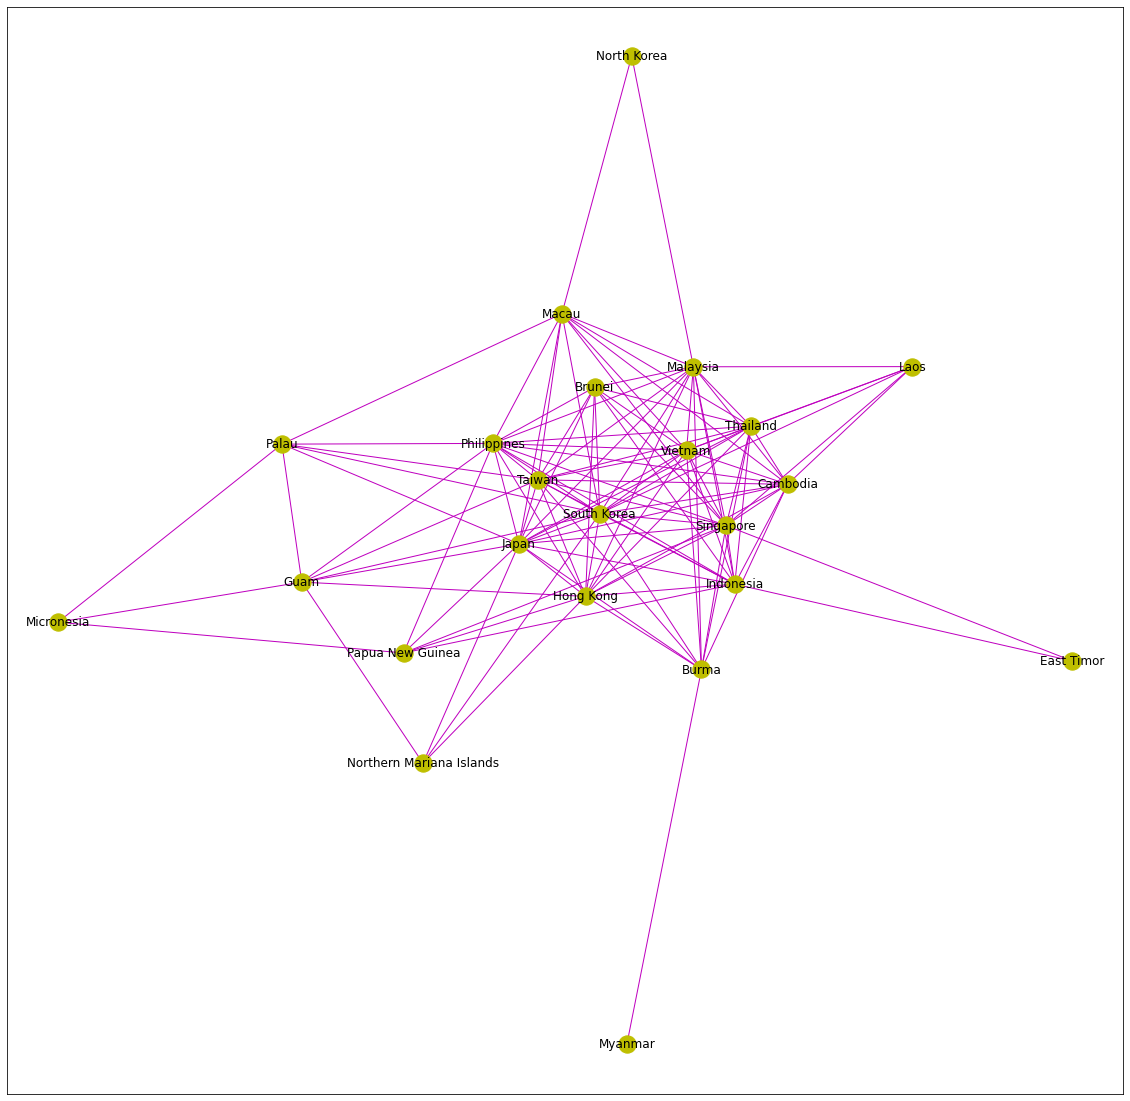

In [111]:
visualizar_comunidades(subgraph_communities[2],2,'y')

Visualizacion Comunidad: 3 



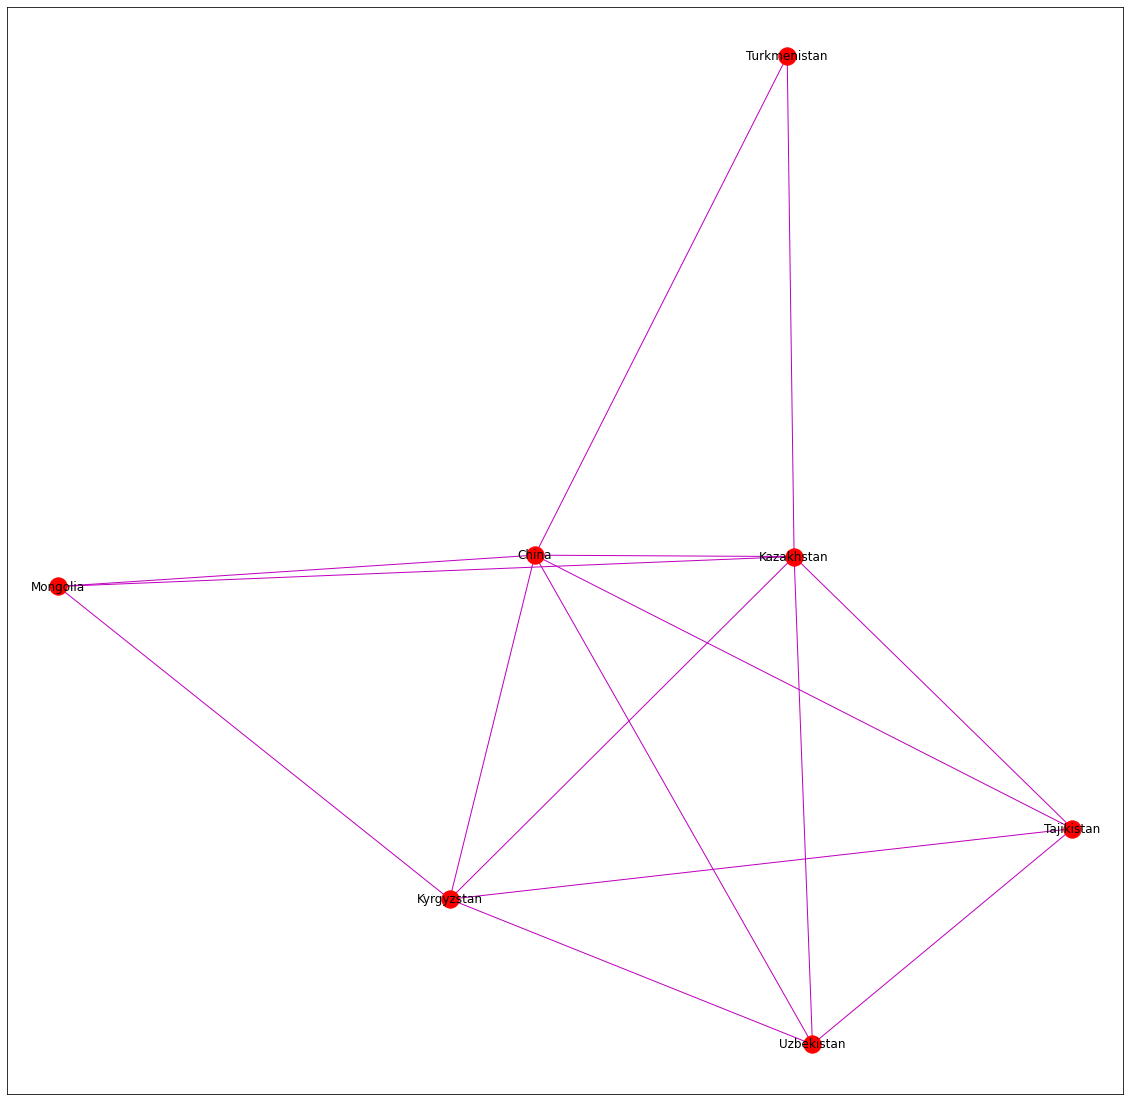

In [112]:
visualizar_comunidades(subgraph_communities[3],3,'r')

MOTIFS 

MOTIF DE HASTA 5 NODOS --------> SUBRED : COMUNIDAD 0

In [113]:
from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile

In [115]:
MAX_NODOS_MOTIFS = 5
motifs = calcular_motifs(subgraph, MAX_NODOS_MOTIFS)
print(motifs)

[  6143   1886  32014  27131   1696  46304  18213   4961  91584 271757
  77490 207343 133110 230084   2727  31572 302549  43112 182085   1390
  27312  58795 190912 134532  11965 149526  11012  50191   9254]


In [ ]:
dist = distribucion_grados(subgraph)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=20)


NameError: name 'distribucion_grados' is not defined

In [ ]:
SP = significance_profile(motifs, promedios, stds)
print("SP:", SP)

In [ ]:
graficar_significant_profile(SP, 'Red de Vuelos')

ROLES

ROLES DENTRO SE SUBRED: COMUNIDAD 0

In [179]:
import warnings
import seaborn as sns

feature_extractor = RecursiveFeatureExtractor(flights_graph)
features = feature_extractor.extract_features()

# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles
print('\nNode role assignments:')
print(node_roles)



# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in flights_graph
node_colors = [role_colors[node_roles[node]] for node in flights_graph.nodes]


Node role assignments:
{'Afghanistan': 'role_1', 'Albania': 'role_2', 'Algeria': 'role_2', 'American Samoa': 'role_1', 'Angola': 'role_2', 'Anguilla': 'role_1', 'Antigua and Barbuda': 'role_1', 'Argentina': 'role_2', 'Armenia': 'role_1', 'Aruba': 'role_1', 'Australia': 'role_2', 'Austria': 'role_0', 'Azerbaijan': 'role_2', 'Bahamas': 'role_1', 'Bahrain': 'role_2', 'Bangladesh': 'role_2', 'Barbados': 'role_1', 'Belarus': 'role_2', 'Belgium': 'role_4', 'Belize': 'role_1', 'Benin': 'role_1', 'Bermuda': 'role_1', 'Bhutan': 'role_1', 'Bolivia': 'role_1', 'Bosnia and Herzegovina': 'role_2', 'Botswana': 'role_1', 'Brazil': 'role_2', 'British Virgin Islands': 'role_1', 'Brunei': 'role_1', 'Bulgaria': 'role_2', 'Burkina Faso': 'role_1', 'Burma': 'role_1', 'Burundi': 'role_1', 'Cambodia': 'role_1', 'Cameroon': 'role_1', 'Canada': 'role_2', 'Cape Verde': 'role_2', 'Cayman Islands': 'role_1', 'Central African Republic': 'role_1', 'Chad': 'role_1', 'Chile': 'role_2', 'China': 'role_2', 'Christmas 

In [188]:
count=list(set([i for i in node_roles.values()]))
print("Cantidad de roles detectados:",len(count))

Cantidad de roles detectados: 5


In [194]:
rol_1=[]
rol_2=[]
rol_3=[]
rol_4=[]
rol_5=[]
roles=[]
for i in node_roles.items():
     if i[1]=='role_0':
          rol_1.append(i[0])
     if i[1]=='role_1':
          rol_2.append(i[0])
     if i[1]=='role_2':
          rol_3.append(i[0])
     if i[1]=='role_3':
          rol_4.append(i[0]) 
     if i[1]=='role_4':
          rol_5.append(i[0])    

roles.append(rol_1)
roles.append(rol_2) 
roles.append(rol_3) 
roles.append(rol_4) 
roles.append(rol_5)

In [196]:
for i in range(len(roles)):
    print("Rol ------>",i,":\n",roles[i])


Rol ------> 0 :
 ['Austria', "Cote d'Ivoire", 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Greece', 'Hungary', 'India', 'Italy', 'Malaysia', 'Malta', 'Norway', 'Poland', 'Russia', 'Sweden', 'Switzerland', 'Thailand', 'Ukraine', 'United States']
Rol ------> 1 :
 ['Afghanistan', 'American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'British Virgin Islands', 'Brunei', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Cayman Islands', 'Central African Republic', 'Chad', 'Christmas Island', 'Cocos (Keeling) Islands', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cook Islands', 'Djibouti', 'Dominica', 'East Timor', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', '

Visualizacion Comunidad: 0 



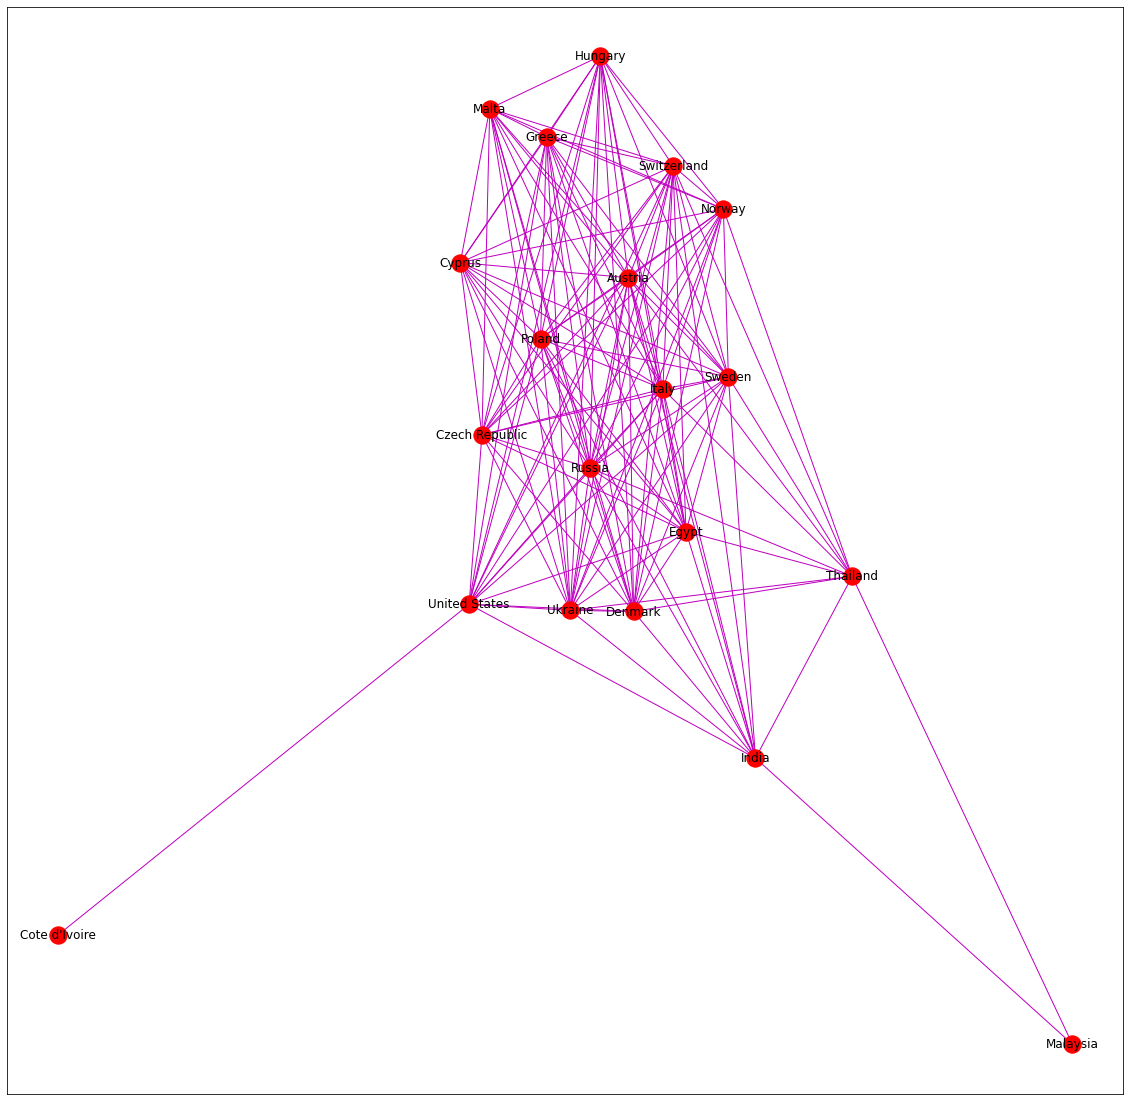

In [197]:
visualizar_comunidades(roles[0],0,'r')

Visualizacion Comunidad: 1 



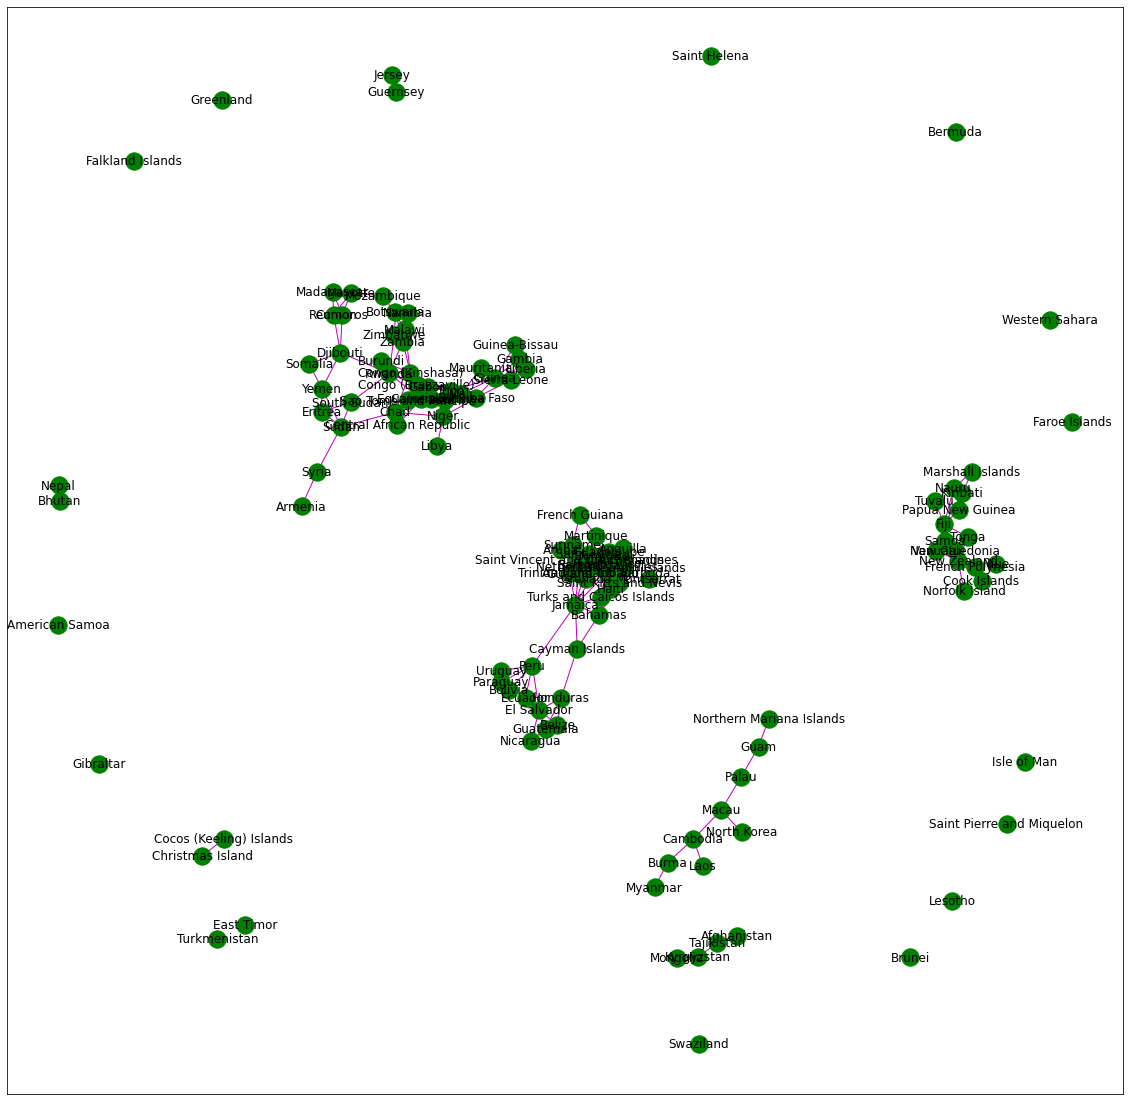

In [198]:
visualizar_comunidades(roles[1],1,'g')

Visualizacion Comunidad: 2 



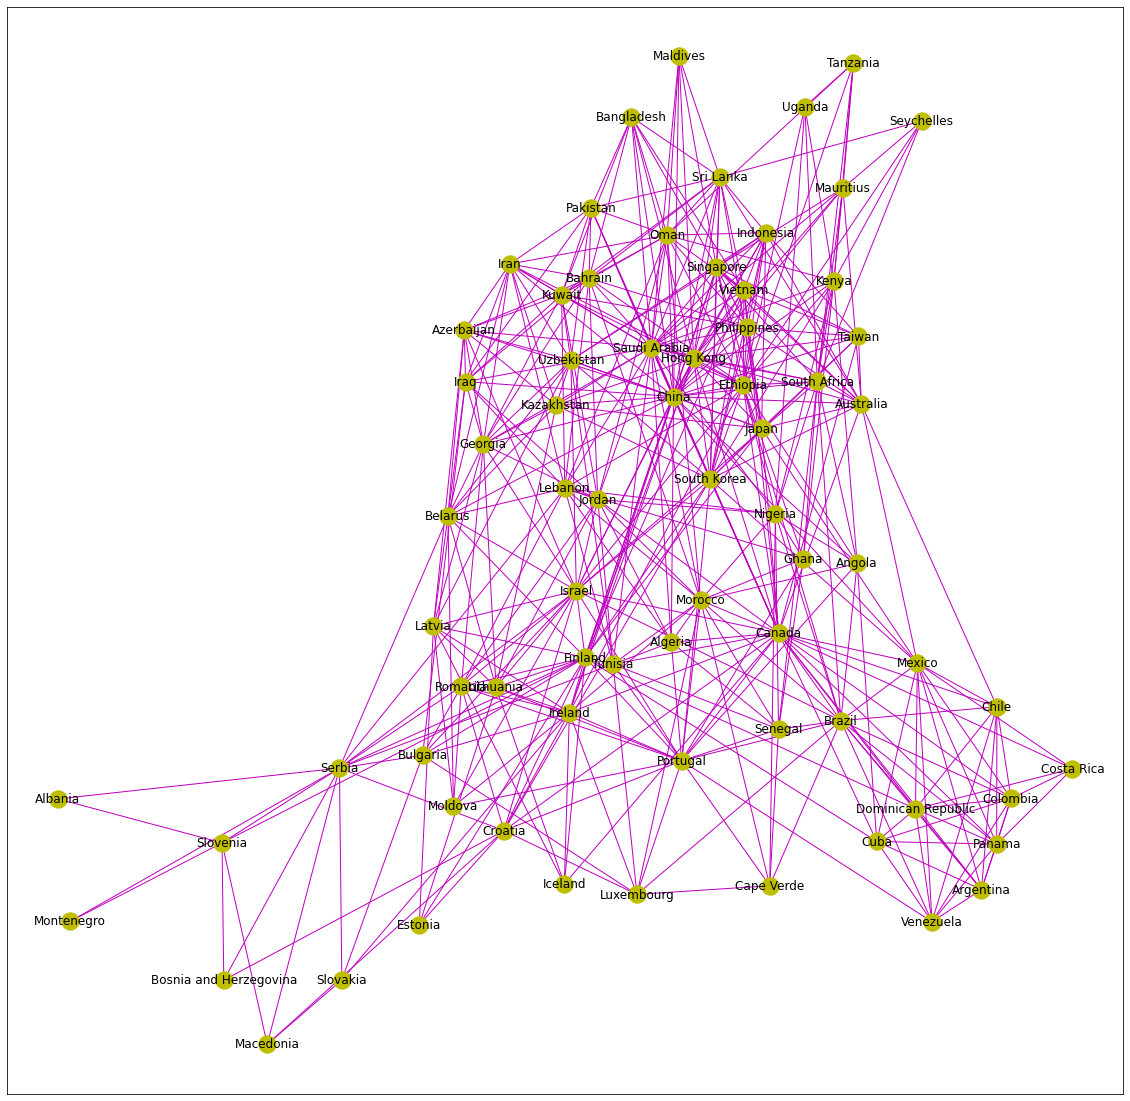

In [199]:
visualizar_comunidades(roles[2],2,'y')

Visualizacion Comunidad: 3 



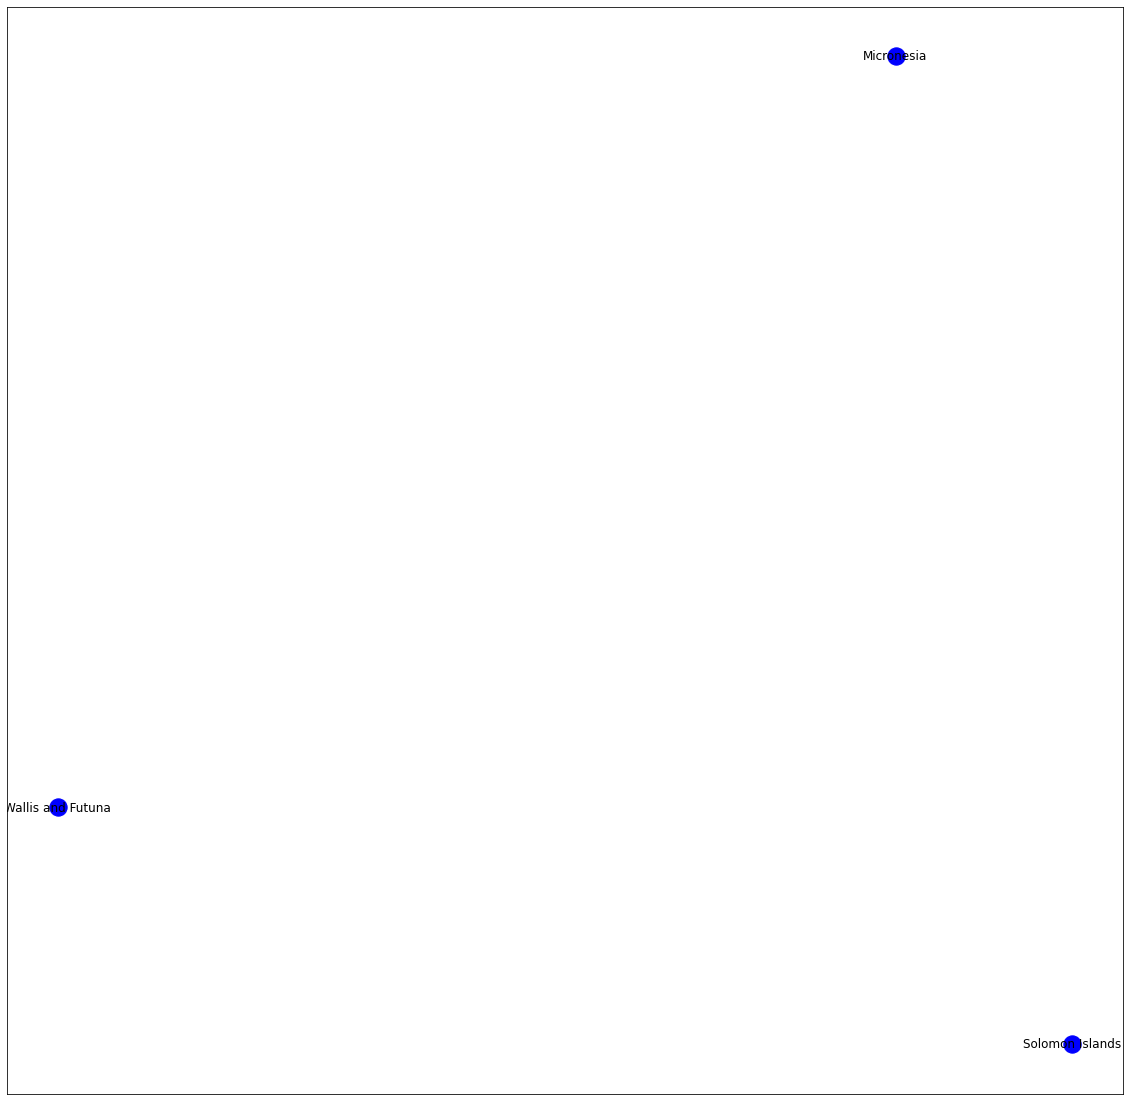

In [201]:
visualizar_comunidades(roles[3],3,'b')

Visualizacion Comunidad: 4 



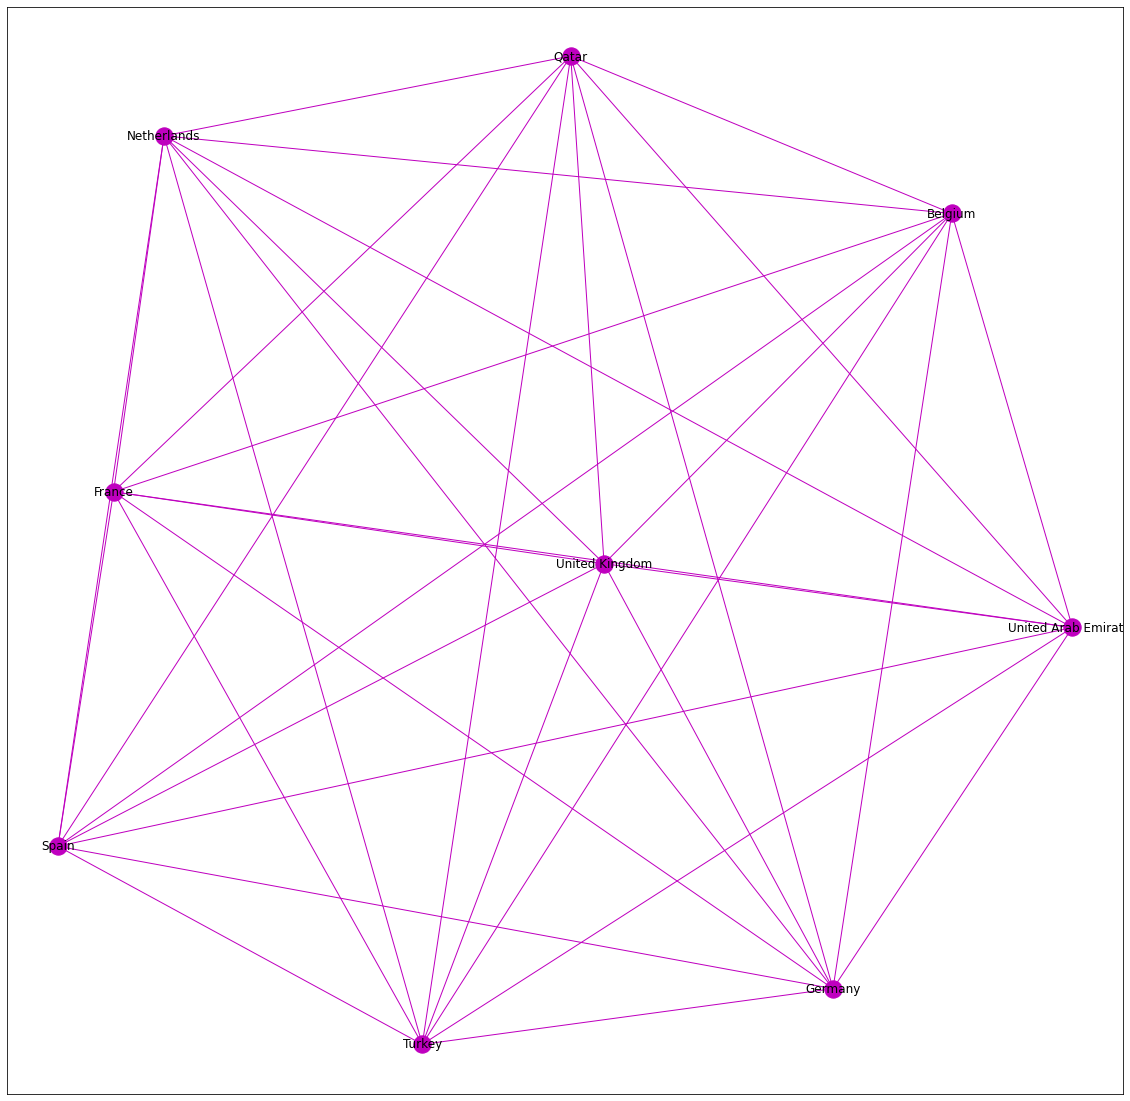

In [202]:
visualizar_comunidades(roles[4],4,'m')

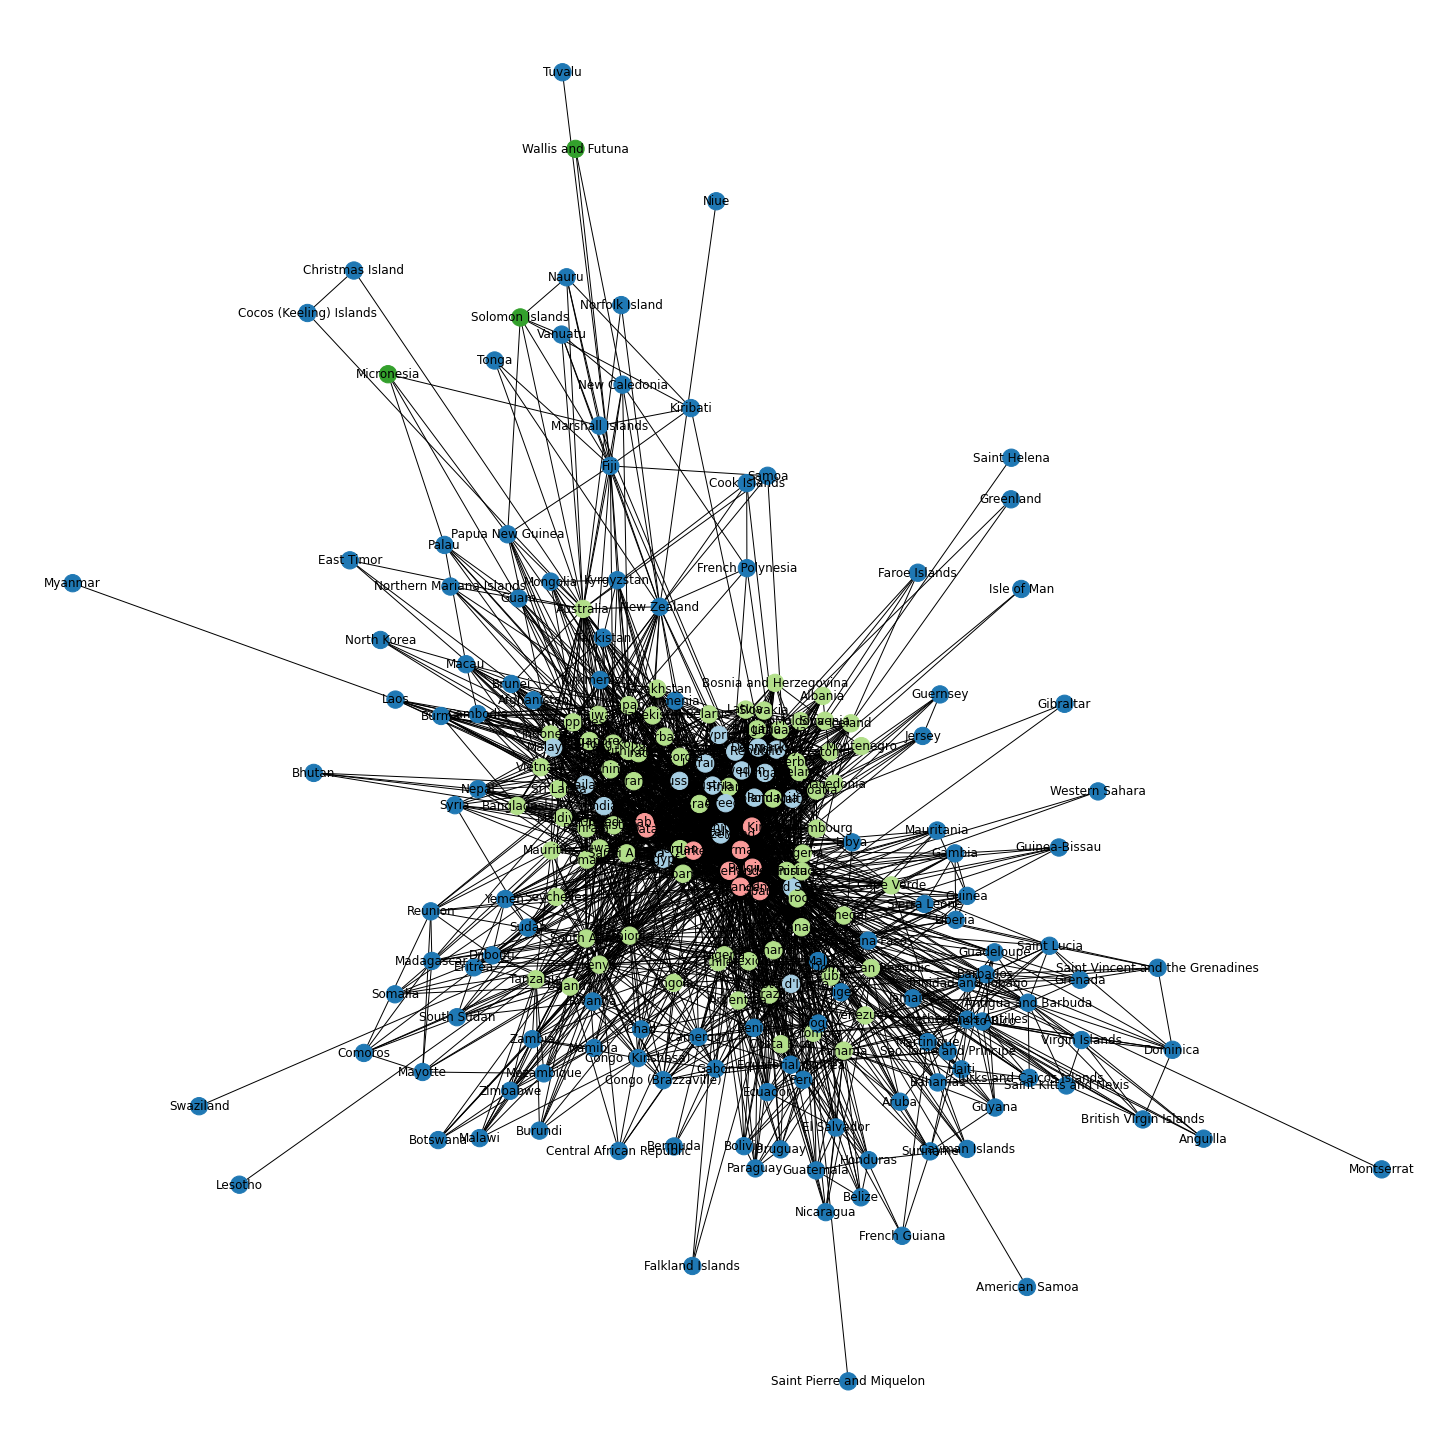

In [175]:
# plot graph
plt.figure(figsize=(20,20))

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        flights_graph,
        pos=nx.spring_layout(flights_graph, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()